In [1]:
def folder_structure(name, node): #use for f.visititems(folder_structure) to see entries of hdf5 file
    if isinstance(node, h5py.Group):
        print(node.name)
    elif isinstance(node, h5py.Dataset):
        if (node.dtype == 'object') :
            print (node.name, 'contains numeric data')
        else:
            print('\t', node.name, node.shape)

In [2]:
%matplotlib notebook
# %pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

import numpy as np
import os
from matplotlib import pyplot as plt
# os.environ['OPENCL_VENDOR_PATH'] = '/etc/OpenCL/vendors'

#sys.path.append(os.path.expanduser('/asap3/petra3/gpfs/p10/2018/data/11004977/processed/jupyter (copy 1)/Xana'))
from Xana import Xana
from Xana.misc.makemask import masker
from matplotlib.colors import LogNorm

import pandas
import pickle as pkl

import h5py
import hdf5plugin

In [3]:
# import ipywidgets
# # interactive plotting
# %matplotlib widget

In [4]:
ls /gpfs/easy/data/visitor/sc5275/id10/silica_gly23/silica_gly23_0001/scan0001/

ls: cannot access /gpfs/easy/data/visitor/sc5275/id10/silica_gly23/silica_gly23_0001/scan0001/: No such file or directory


# Show all the masks generated

## Cryo masks

In [10]:
!ls /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup

cryo-mask-230417_03.npy  mask-anita.npy        setup-fullmask-cryo-230417.pkl
cryo-mask-230417_04.npy  saxs-mask-241116.npy
cryo-mask-230628_01.npy  setup_anita.pkl


In [13]:
# mask_mario1 = np.load('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/mario/masks/empty-mask-cryo-JUN17T20-26.npy')
# mask_mario2 = np.load('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/mario/masks/empty-mask-cryo-JUN17T17-12.npy')
# mask_mario3 = np.load('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/mario/masks/empty_mask_cryo_01.npy')
# mask_mine = np.load('/cfs/home/mabi3848/id10-ferritin-2022/test/setups/mask-cryo-230406.npy')
mask_last = np.load('/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/saxs-mask-241116.npy')

Text(0.5, 1.0, 'new')

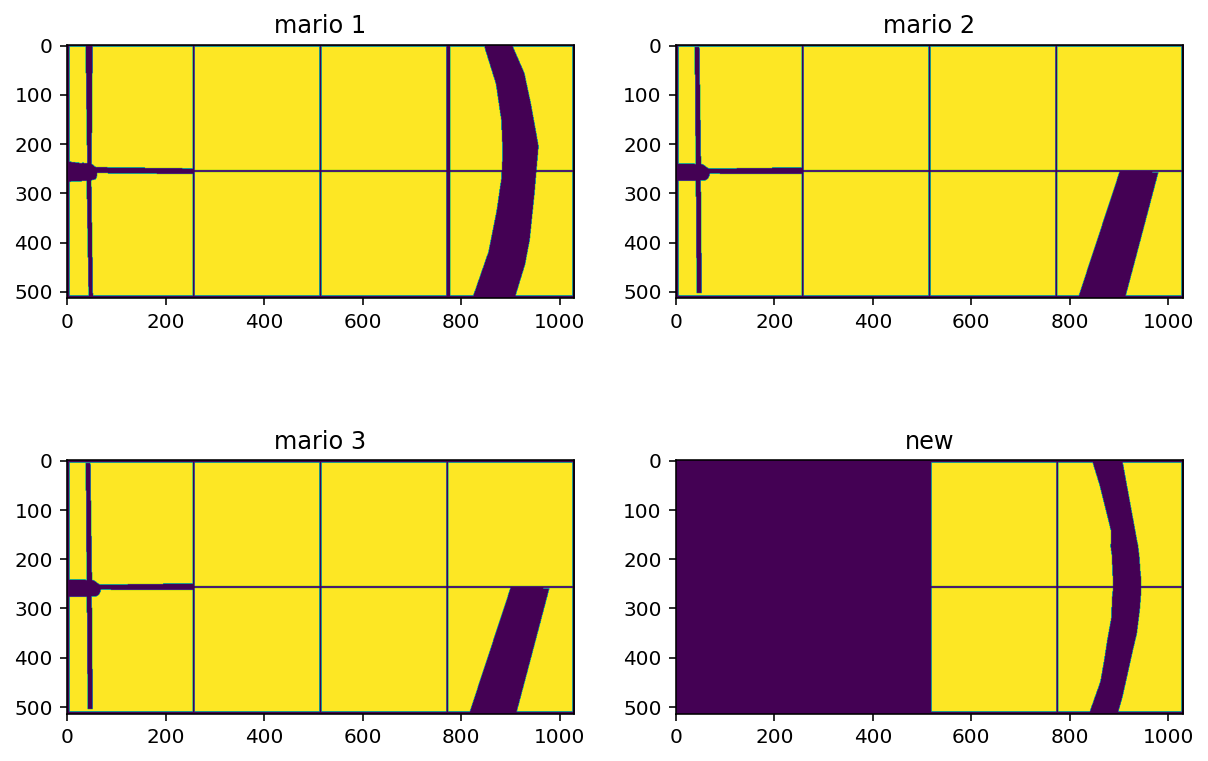

In [14]:
fig, ((a1,a2),(a3,a4)) = plt.subplots(2,2,figsize=(10,7))

a1.imshow(mask_mario1)
a1.set_title('mario 1')
a2.imshow(mask_mario2)
a2.set_title('mario 2')
a3.imshow(mask_mario3)
a3.set_title('mario 3')
a4.imshow(mask_last)
a4.set_title('new')



#  Create mask

In [15]:
datdir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/'
filename = 'ferritin_conc_gly_50_4/ferritin_conc_gly_50_4_0002/scan0001/eiger1_0000.h5'
with h5py.File(datdir + filename, 'r') as f: #path to file for mask creation
    #f.visititems(folder_structure)
    data = f['/entry_0000/ESRF-ID10/eiger1/data']
    print(data.shape)
    data_mean = np.mean(data,axis=0)

(5000, 514, 1030)


In [5]:
d = Xana()
d.masker(data_mean)

Output()

In [12]:
# Eiger 500 default mask
mask2 = np.ones(data_mean.shape)
#mask border
mask2[0:3,:]=0
mask2[-4:-1,:]=0
mask2[:,-4:-1]=0
mask2[:,0:3]=0

#mask big pixels
mask2[256:259,:]=0
mask2[:,256:259]=0
mask2[:,515:517]=0
mask2[:,772:775]=0

In [14]:
mask_dead=np.load('maybe_dead.npy')

In [15]:
mask1 = np.load('ferritin_mask2.npy')

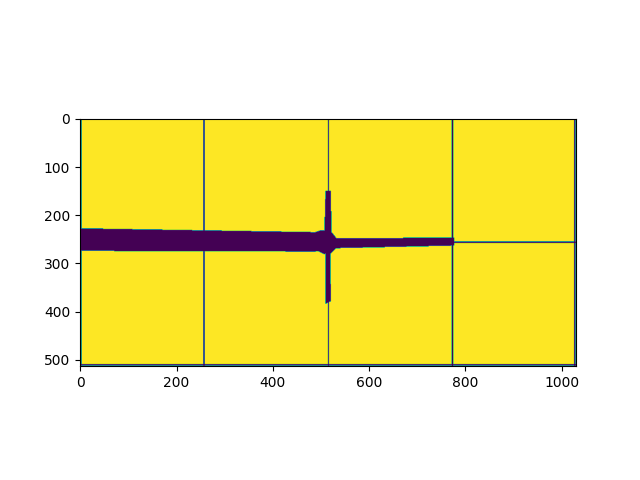

In [16]:
fig, ax = plt.subplots()
mask = np.multiply(np.multiply(mask1,mask2),mask_dead)
mask_bool = mask>0
ax.imshow(np.multiply(mask1,mask2))

In [17]:
np.save('ferritin_mask.npy',mask_bool)

In [20]:
mask_bla = np.load('silica_mask.npy')

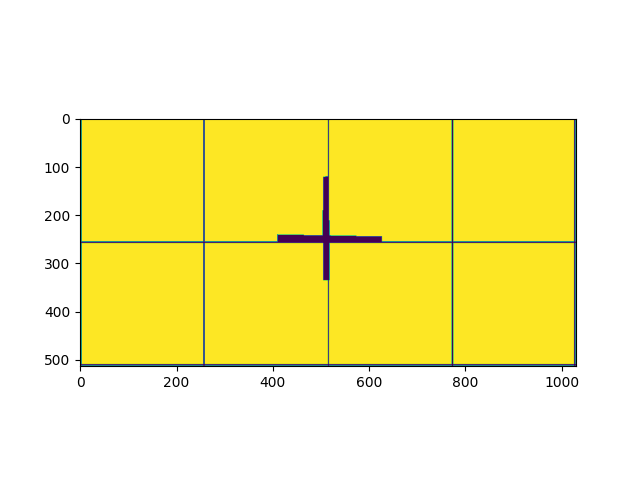

In [21]:
fig,ax = plt.subplots()
ax.imshow(mask_bla)

# Create setup

**From Mario**

In [ ]:
# xana.setup.make(**{'center':(515,257), 'wavelength':12.38/9, 'distance':7.11})  # peltier configuration
xana.setup.make(**{'center':(45,257), 'wavelength':12.38/9, 'distance':7.11})  # cryo configuration

In [ ]:
qv_init = [(np.arange(.016, .47, .05), .049)]
xana.defineqrois(I, qv_init=qv_init, plot=2, d=1000)

In [ ]:
qv_init = [(np.arange(.016, .47, .05), .049)]
xana.defineqrois(I, qv_init=qv_init, plot=2, d=1000)

**From Sonja**

In [16]:
!ls /cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/

cryo-mask-230417_03.npy  mask-anita.npy        setup-fullmask-cryo-230417.pkl
cryo-mask-230417_04.npy  saxs-mask-241116.npy
cryo-mask-230628_01.npy  setup_anita.pkl


In [17]:
sample = 'ferritin_conc_gly_50_5' # name of the sample
series = 5                 # number of series that will be loaded
rawdir = '/gpfs/easy/data/visitor/sc5275/id10/'       # path to raw directory, add or remove '../' depending on where you are in the folder tree
fmtstr = 'ebs_id10_eiger500k'    # string for file format, does not need to be changed
detector = 'eiger500k'
distance = 7110 # mm
pixelSize = 0.075 #mm
pulseEnergy = 9000 # eV

maskfile = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/20220614/processed/mask-setup/saxs-mask-241116.npy'
# maskfile = '../maddalena/02-setups/e500k_mask2.npy' # enter name of mask that you want to use (needs to match the size of the detector)
setup = 'setup-saxs-241116' # enter name of the setup that you are goint to create


In [19]:
print(rawdir+sample + '/' + sample + '_0042/')

/gpfs/easy/data/visitor/sc5275/id10/ferritin_conc_gly_50_5/ferritin_conc_gly_50_5_0042/


In [20]:
d = Xana(sample=sample, fmtstr=fmtstr, detector=detector,maskfile=maskfile)            #create Xana object
#d.connect('../'+'DUKE/'+'DUKE_0001/'+'scan00{:02d}/'.format(series)) #connect Xana object to data folder
d.connect(rawdir+sample + '/' + sample + '_0005/') #connect Xana object to data folder
d.meta  #look into meta data, if no table is appearing, check the path

,series,t_exposure,t_readout,nframes,master,first,last,datdir
0,1,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...
1,2,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...
2,3,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...
3,4,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...
4,5,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...
...,...,...,...,...,...,...,...,...
443,444,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...
444,445,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...
445,446,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...
446,447,0.0004,0.000003,5000,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...,0,4999,/gpfs/easy/data/visitor/sc5275/id10/ferritin_c...


In [21]:
meanIntensity, varIntensity = d.get_series(4, verbose=1, method='average') # get intensity of first few frames, will be background when the Qrings are visualised

First images is:  0
Last image is:  4999
Loading data in chunks of 200 images.
[============================================================] 100.0%...


NameError: name 'maskfile' is not defined

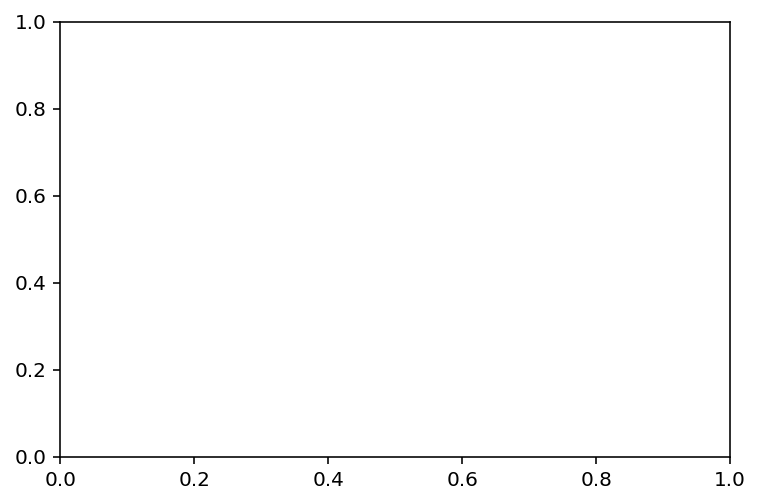

In [5]:
fig, ax = plt.subplots()
mask = np.load(maskfile)
im = ax.imshow(np.multiply(meanIntensity,mask))
plt.colorbar(im)

In [16]:
print(mask[0,0])

False


In [ ]:
fig, ax = plt.subplots()
# extract colorscale limits
mi, ma = np.nanpercentile(meanIntensity, [0.5,99.5])
log = False
# get colormap
cmap = plt.get_cmap('viridis')
# check whether logscale makes sense
if(ma < 0):
    print('Warning: No log plot possible, maximum value is negative! Switched to linear scale.')
    log = False
if(log): # logscale if log
    mi = max(1, mi)
    p = ax.imshow(np.multiply(meanIntensity,mask), cmap=cmap, norm=matplotlib.colors.LogNorm(vmin=mi, vmax=ma))
else: # else linear
    p = ax.imshow(np.multiply(meanIntensity,mask), cmap=cmap, vmin=mi, vmax=ma)
fig.colorbar(p) # add colorbar

## manual defined Q rings

Added the following Q-values [nm-1]:
[0.02 0.04]


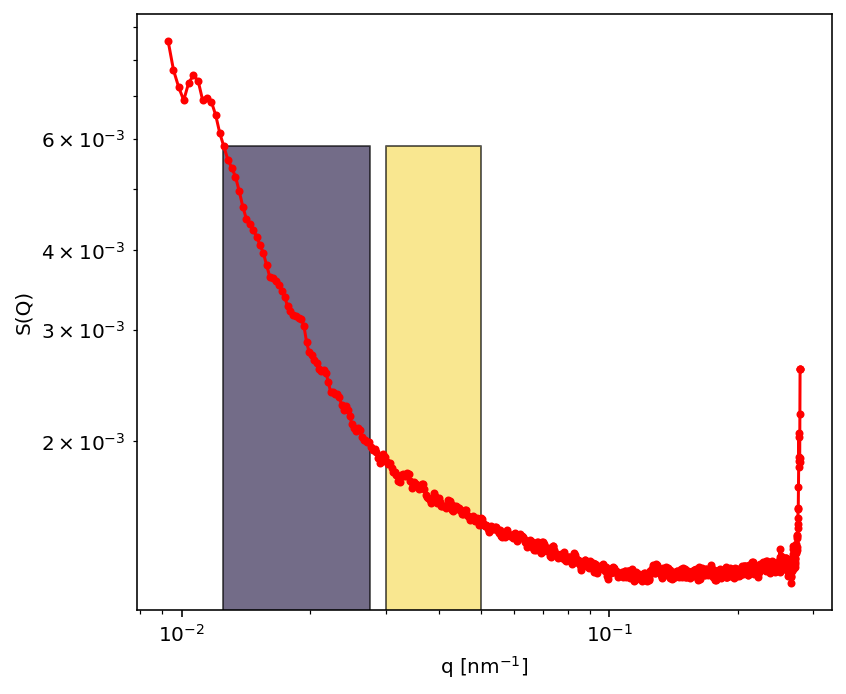

In [22]:
%matplotlib inline
d.setup.make(**{'wavelength':np.divide(12.398,pulseEnergy/1000), 'center':(514,257), 'pixel_size':(75,75), 'distance':7.045})

qv_init = [(0.02,0.015),(0.04,0.02)
           
          ]

# qv_init = [ 
#     (0.022,0.003),
#     #(0.025,0.003),
#     #(0.028,0.003),
#     (0.031,0.003),
#     #(0.035,0.005),
#     #(0.04,0.005),
#     (0.045,0.005),
#     #(0.05,0.005),
#     #(0.055,0.005),
#     #(0.06,0.005),
#     (0.065,0.005),
#     (0.073,0.009),
#     #(0.083,0.011),
#     (0.101,0.027),
#     #(0.132,0.035),
#     (0.167,0.035),
#     #(0.202,0.035),
#     (0.237,0.035),
#     #(0.272,0.035),
#     (0.307,0.035),
#     #(0.352,0.055),
#     (0.407,0.055),
# ]   
             

d.defineqrois(meanIntensity, qv_init=qv_init, plot=1, d=2000)

Added the following Q-values [nm-1]:
[0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11]


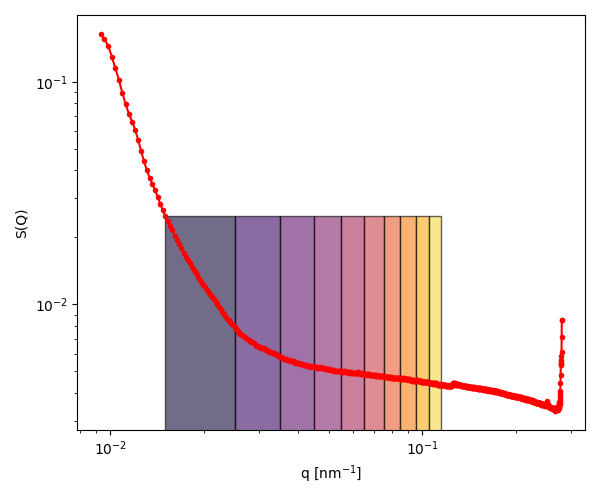

In [21]:
d.setup.make(**{'wavelength':np.divide(12.398,pulseEnergy/1000), 'center':(514,257), 'pixel_size':(75,75), 'distance':7.045})

qv_init = [(np.arange(0.02, 0.12, 0.01), 0.01), #syntax (start Q value, end Q value, step), width of Q-ring
           
          ]#e4m_xpcs_largeq 

d.defineqrois(meanIntensity, qv_init=qv_init, plot=1, d=1000)

In [59]:
print(setup)

ferritin_conc_6q


In [22]:
d.mksavdir('setupfiles', './') # setup will be saved in directory setupfiles
d.savesetup(setup) # save setup

Changing savdir to:
	/gpfs/easy/data/visitor/sc5275/id10/20220614/Sonja/setupfiles/
Try loading database:
	/gpfs/easy/data/visitor/sc5275/id10/20220614/Sonja/setupfiles/analysis_database.pkl
Successfully loaded database

Results saved to:
	/gpfs/easy/data/visitor/sc5275/id10/20220614/Sonja/setupfiles/ferritin_alginate_largeq.pkl


In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def GetSetup(setupfile = './setupfiles/example_setup.pkl'):
    setupFile = open(setupfile,'rb')
    setupParams = pkl.load(setupFile)
    setupFile.close()
    
    qValues = setupParams.qv #all properties are listed under https://github.com/reiserm/Xana/blob/master/Xana/Setup.py
    maskFile = setupParams.maskfile
    beamCenter = setupParams.center
    qRoi = setupParams.qroi
    
    return([qValues,maskFile,qRoi,beamCenter])

def add_colorbar(ax, vec, label=None):
    vec = np.array(vec)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)

    cmap = mpl.cm.viridis
    norm = mpl.colors.Normalize(vmin=vec.min(), vmax=vec.max())

    cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,norm=norm,orientation='vertical')
    cb1.set_label(label)

In [43]:
setup = 'ferritin_conc_4q'
setupfile2 = '/gpfs/easy/data/visitor/sc5275/id10/20220614/Anita/results/setup_e500k.pkl'

In [44]:
qValues,maskfile,qRois,beamCenter =GetSetup('./setupfiles/'+setup+'.pkl')#GetSetup(setupfile2)# 

In [45]:
mask = np.load(maskfile)
print(mask.shape)

(514, 1030)


In [46]:
print(mask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False  True]]


In [47]:
qMasks = np.zeros([len(qValues),mask.shape[0],mask.shape[1]])
for q in range(len(qRois)):
    temp_roi = qRois[q]
    num_pix = len(qRois[q][0]) #number of pixels in the Q ring
    I_ges = 0
    for j in range(num_pix):
        x = temp_roi[0][j]
        y = temp_roi[1][j]
        qMasks[q,x,y] = q+1


In [48]:
qMasksSum = np.sum(qMasks,axis=0)

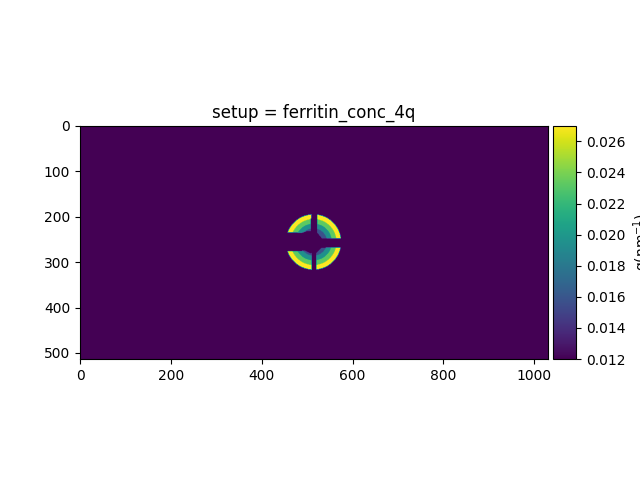

In [49]:
fig, ax = plt.subplots()
ax.imshow(qMasksSum,cmap = mpl.cm.viridis)
ax.set_title('setup = ' + setup)
add_colorbar(ax,qValues,label = 'q($\mathrm{nm}^{-1}$)')

# Cryo mask

In [18]:
datdir = '/cfs/data/pg/sdaqs/esrf-ebs/id10/sc5275/'
# filename = 'water_gly_50/water_gly_50_0002/scan0001/eiger1_0000.h5'
filename = 'ferritin_conc_gly_50_4/ferritin_conc_gly_50_4_0002/scan0001/eiger1_0000.h5'
with h5py.File(datdir + filename, 'r') as f: #path to file for mask creation
    #f.visititems(folder_structure)
    data = np.array(f['/entry_0000/ESRF-ID10/eiger1/data'])
    print(data.shape)
    data_mean = np.mean(data,axis=0)

(5000, 514, 1030)


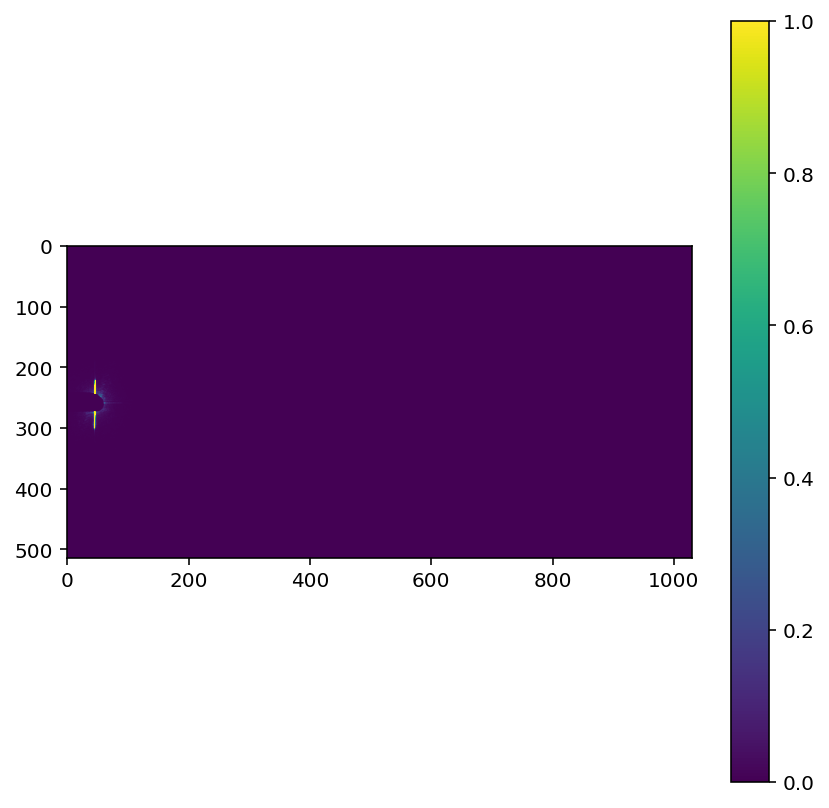

In [19]:
plt.figure(figsize=(7,7))
plt.imshow(data_mean, vmin=0, vmax=1)
plt.colorbar()

In [13]:
!pwd

/cfs/home/mabi3848/id10-ferritin-2022/01-notebooks


In [17]:
!ls ../02-source

elog


In [24]:
np.save('../02-source/ferritin_conc_gly_50_4_0002_scan0001_avg_g2', data_mean)
np.save('../02-source/ferritin_conc_gly_50_4_0002_0002_scan0001_g2', data[0])

In [26]:
!pyfai-drawmask 02-source/water_gly_50_0002_scan0001_avg.npy 

/bin/bash: pyfai-drawmask: command not found
